In [1]:
pip install PySastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 14.9 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import sklearn
import keras
import pickle
import tensorflow as tf
import keras
import collections
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers
from keras.optimizers import Adam, RMSprop, SGD
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Embedding, Dense, Dropout, LSTM, Bidirectional
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.metrics import confusion_matrix
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
#from terbilang import Terbilang

#t = Terbilang()
#nltk.download('stopwords')
#nltk.download('all')

In [3]:
#to print complete sentence
pd.options.display.max_colwidth = 500

In [4]:
#kamus
kamusalay = pd.read_csv('new_kamusalay.csv', encoding =  'ISO-8859-1', names=['old','new'])
kamusalay.head()

,old,new
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali


In [5]:
file_path = "train_preprocess.tsv.txt"
df = pd.read_csv(file_path, delimiter='\t', names=["Tweet", "Sentimen"])
#print(type(df["data"]))
#print(df["data"])

In [6]:
def cleaning_data(text):
    text = text.lower()
    text=re.sub('url', '', text)
    text = re.sub('url\S+', '', text)
    text=re.sub('http', '', text)
    text = re.sub(r'http\S+', '', text)
    #text = re.sub(r'&', 'dan', text)
    #text=re.sub(r'/', 'atau', text)
    #text = re.sub(r'&amp', 'dan', text)
    #text = re.sub(r'&lt;', '', text)
    #text = re.sub(r'&gt;', '', text)
    text = re.sub(r'%', ' persen', text)
    text = re.sub(r' {2,}', ' ', text)
    text=re.sub(r'(\\x(.){2})', '', text) #emoticon
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
    return text


In [7]:
# Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
def stemmingText(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = stemmer.stem(text)
    #text = [stemmer.stem(word) for word in text]
    return text

#Convert list of words into sentence
#def toSentence(list_words):
#    sentence = ' '.join(word for word in list_words)
#    return sentence

In [8]:
#split the data
def convert(lst):
    return ''.join(lst).split()

In [9]:
# check with kamus alay
def filter_data(text):
        result = ""
        tweets = text
        #print(tweets)
        temp=[]
        for tweet in tweets:
            try:
                trying = np.where(kamusalay['old']==tweet)[0][0]
                tweet = kamusalay['new'].iloc[trying]
            except:
                tweet = tweet
            #print(tweet)
            temp.append(tweet)
            result = result + " " + tweet
        return result

In [10]:
df['ReviewTweet'] = df['Tweet'].apply(cleaning_data)
df['ReviewTweet']=df['ReviewTweet'].apply(convert)
df['ReviewTweet']=df['ReviewTweet'].apply(filter_data)
df['ReviewTweet'] = df['ReviewTweet'].apply(stemmingText)

In [11]:
df.head()

,Tweet,Sentimen,ReviewTweet
0,"warung ini dimiliki oleh pengusaha pabrik tahu yang sudah puluhan tahun terkenal membuat tahu putih di bandung . tahu berkualitas , dipadu keahlian memasak , dipadu kretivitas , jadilah warung yang menyajikan menu utama berbahan tahu , ditambah menu umum lain seperti ayam . semuanya selera indonesia . harga cukup terjangkau . jangan lewatkan tahu bletoka nya , tidak kalah dengan yang asli dari tegal !",positive,warung ini milik oleh usaha pabrik tahu yang sudah puluh tahun kenal buat tahu putih di bandung tahu kualitas padu ahli masak padu kretivitas jadi warung yang saji menu utama bahan tahu tambah menu umum lain seperti ayam semua selera indonesia harga cukup jangkau jangan lewat tahu bletoka nya tidak kalah dengan yang asli dari tegal
1,mohon ulama lurus dan k212 mmbri hujjah partai apa yang harus diwlh agar suara islam tidak pecah-pecah,neutral,mohon ulama lurus dan k212 mmbri hujjah partai apa yang harus diwlh agar suara islam tidak pecah pecah
2,"lokasi strategis di jalan sumatera bandung . tempat nya nyaman terutama sofa di lantai 2 . paella nya enak , sangat pas dimakan dengan minum bir dingin . appetiser nya juga enak-enak .",positive,lokasi strategis di jalan sumatra bandung tempat nya nyaman utama sofa di lantai 2 paella nya enak sangat pas makan dengan minum bir dingin appetiser nya juga enak enak
3,betapa bahagia nya diri ini saat unboxing paket dan barang nya bagus ! menetapkan beli lagi !,positive,betapa bahagia nya diri ini saat unboxing paket dan barang nya bagus tetap beli lagi
4,"duh . jadi mahasiswa jangan sombong dong . kasih kartu kuning segala . belajar dulu yang baik , tidak usahlah ikut-ikut politik . nanti sudah selesai kuliah nya mau ikut politik juga tidak telat . dasar mahasiswa .",negative,aduh jadi mahasiswa jangan sombong dong kasih kartu kuning segala ajar dulu yang baik tidak usah ikut ikut politik nanti sudah selesai kuliah nya mau ikut politik juga tidak telat dasar mahasiswa


**LSTM with BOW**

In [12]:
neg = df.loc[df['Sentimen'] == 'negative'].ReviewTweet.tolist()
neu = df.loc[df['Sentimen'] == 'neutral'].ReviewTweet.tolist()
pos = df.loc[df['Sentimen'] == 'positive'].ReviewTweet.tolist()

neg_label = df.loc[df['Sentimen'] == 'negative'].Sentimen.tolist()
neu_label = df.loc[df['Sentimen'] == 'neutral'].Sentimen.tolist()
pos_label = df.loc[df['Sentimen'] == 'positive'].Sentimen.tolist()

total_data = pos + neu + neg
labels = pos_label + neu_label + neg_label

In [13]:
#use Bag of Words (BOW)

vectorizer = CountVectorizer()
vectorizer.fit(total_data)
X = vectorizer.transform(total_data).toarray()

In [14]:
y = pd.get_dummies(labels)

In [15]:
# Split the data (with composition data train 80%, data test 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8800, 1, 12209) (8800, 3)
(2200, 1, 12209) (2200, 3)


In [16]:
model_lstm=Sequential()
model_lstm.add(LSTM(128, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm.add(Dense(64, activation='relu'))
model_lstm.add(Dense(3, activation='softmax'))
model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

adam = keras.optimizers.Adam(learning_rate=0.005)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)

print(model_lstm.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               6317056   
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 6,325,507
Trainable params: 6,325,507
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
modellstm=Sequential()
modellstm.add(LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
modellstm.add(Dense(8, activation='relu'))
modellstm.add(Dense(3, activation='softmax'))
modellstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

adam = keras.optimizers.Adam(learning_rate=0.005)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)

print(model_lstm.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               6317056   
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 6,325,507
Trainable params: 6,325,507
Non-trainable params: 0
_________________________________________________________________
None


In [18]:
history = model_lstm.fit(X_train, y_train, epochs=35, batch_size=16, validation_data=(X_test, y_test), verbose=1, callbacks=[es])

Epoch 1/35
550/550 [==============================] - 10s 6ms/step - loss: 0.4517 - accuracy: 0.8286 - val_loss: 0.3398 - val_accuracy: 0.8859
Epoch 2/35
550/550 [==============================] - 3s 5ms/step - loss: 0.1788 - accuracy: 0.9372 - val_loss: 0.3696 - val_accuracy: 0.8836
Epoch 3/35
550/550 [==============================] - 3s 5ms/step - loss: 0.0747 - accuracy: 0.9706 - val_loss: 0.4971 - val_accuracy: 0.8723
Epoch 4/35
550/550 [==============================] - 3s 5ms/step - loss: 0.0339 - accuracy: 0.9844 - val_loss: 0.6027 - val_accuracy: 0.8723
Epoch 5/35
550/550 [==============================] - 3s 5ms/step - loss: 0.0189 - accuracy: 0.9925 - val_loss: 0.7668 - val_accuracy: 0.8732
Epoch 5: early stopping


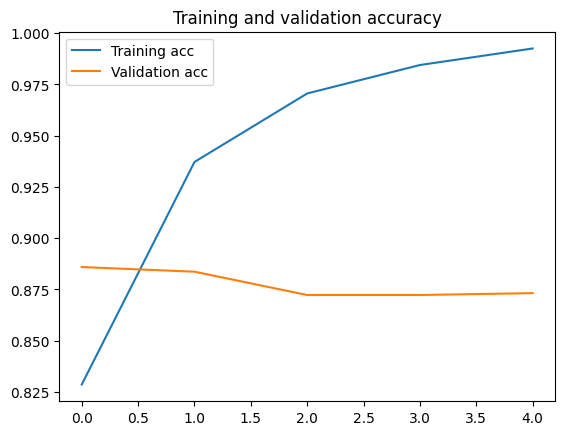

In [19]:
plt.plot(history.history['accuracy'], label='Training acc')
plt.plot(history.history['val_accuracy'], label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

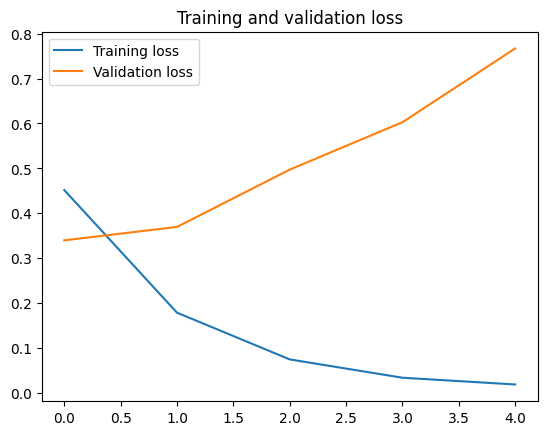

In [20]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()